In [1]:
import requests
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import requests 
from scipy import stats
import seaborn as sns
from Scott_keys import yelpkey

In [2]:
# import Ryan's delivery data

delivery_data = pd.read_csv("delivery_dataframe_run.csv")
delivery_df = pd.DataFrame(delivery_data)
delivery_df.head()

,Zip Code,# Pizza/Chinese Restaurants,# That Deliver,% That Deliver,% No Cars
0,10001,50,35.0,0.700000,82.6
1,10002,160,54.0,0.337500,81.6
2,10003,89,62.0,0.696629,78.3
3,10004,20,12.0,0.600000,81.1
4,10005,6,4.0,0.666667,83.5


In [3]:
# format the % deliver column to match % no cars

delivery_df['% That Deliver'] = (delivery_df['% That Deliver'] * 100).map('{:,.1f}'.format)
delivery_df.head()

,Zip Code,# Pizza/Chinese Restaurants,# That Deliver,% That Deliver,% No Cars
0,10001,50,35.0,70.0,82.6
1,10002,160,54.0,33.8,81.6
2,10003,89,62.0,69.7,78.3
3,10004,20,12.0,60.0,81.1
4,10005,6,4.0,66.7,83.5


In [4]:
# check data types
delivery_df.dtypes

Zip Code                         int64
# Pizza/Chinese Restaurants      int64
# That Deliver                 float64
% That Deliver                  object
% No Cars                      float64
dtype: object

In [5]:
# convert % deliver to float data type
delivery_df['% That Deliver'] = delivery_df['% That Deliver'].astype(float)
delivery_df.dtypes


Zip Code                         int64
# Pizza/Chinese Restaurants      int64
# That Deliver                 float64
% That Deliver                 float64
% No Cars                      float64
dtype: object

In [6]:
# calculate P value
slope, intercept, r_value, p_value, std_err = stats.linregress(delivery_df['% That Deliver'], delivery_df['% No Cars'])
print(p_value)


0.0012373177024357993


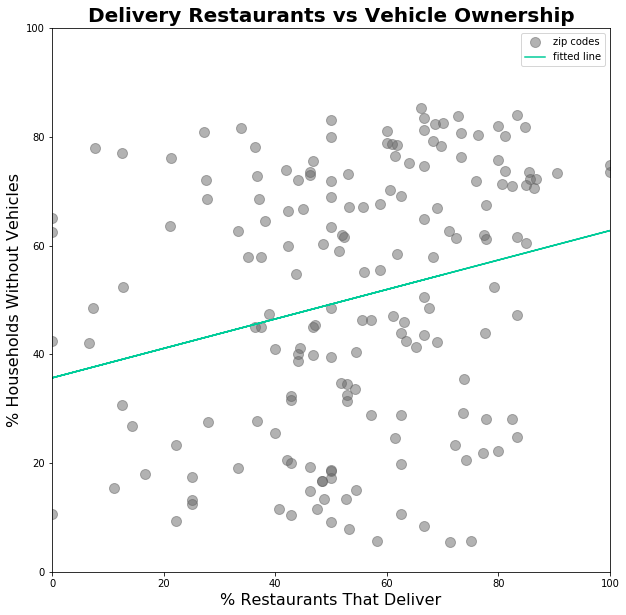

In [11]:
# plot scatter
plt.figure(figsize=(10,10))
plt.plot(delivery_df['% That Deliver'], delivery_df['% No Cars'], 'o', color= '#666666', alpha=.5, label='zip codes', markersize=10)
plt.plot(delivery_df['% That Deliver'], intercept + slope*(delivery_df['% That Deliver']), color='#00CC99', label='fitted line')
plt.legend()
plt.ylim([0,100]) 
plt.xlim([0,100])
plt.title("Delivery Restaurants vs Vehicle Ownership",fontsize=20, fontweight="bold")
plt.xlabel("% Restaurants That Deliver",fontsize=16)
plt.ylabel("% Households Without Vehicles",fontsize=16)
plt.show()
